## Подготовка данных

### Импорты

In [1]:
!pip install opendatasets --quiet

In [2]:
import opendatasets as od
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MultiLabelBinarizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import ast

### Функции

In [3]:
def transaformation_null_value(df, column):
  """
  Преобразует значения у столбца column в 1, если это значение не является null, иначе 0
  """
  df[column] = df[column].apply(lambda x: 1 if pd.isnull(x) else 0)
  return df[f'{column}']

In [4]:
def transform_to_list(df, column):
  """
  Преобразовываем столбец в list
  """
  return df[column].apply(lambda s: list(ast.literal_eval(s)))


___

## Загрузка данных

In [5]:
url = 'https://www.kaggle.com/competitions/tutors-lessons-prices-prediction'

od.download(url)

Skipping, found downloaded files in "./tutors-lessons-prices-prediction" (use force=True to force download)


In [6]:
# Загружаем полученные данные в DataFrame
data_samples = pd.read_excel("tutors-lessons-prices-prediction/train.xlsx")
data_test = pd.read_excel("tutors-lessons-prices-prediction/test.xlsx")
data_examples = pd.read_csv("tutors-lessons-prices-prediction/sample_submit.csv")

In [7]:
data_samples.head(3)

,Unnamed: 0,предмет,ФИО,tutor_head_tags,tutor_rating,tutor_reviews,description,experience_desc,Education_1,Desc_Education_1,...,status,experience,Desc_Education_5,Desc_Education_6,Education_5,Education_6,Ученая степень 2,Ученое звание 2,categories,mean_price
0,0,matematika,Репетитор по математике Емельянова Марина Вла...,"['Школьная программа', 'Подготовка к ЕГЭ', 'По...",5.0,2,Репетитор не предоставил о себе дополн...,NaN,Томский государственный университет им. В.В. ...,"Год окончания: 1990, Факультет: механико-мате...",...,Университетский преподаватель,31 год,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 5 по 9 класс', 'Школьники с 10 п...",16.666667
1,1,matematika,Репетитор по математике Назарова Анастасия Ан...,"['Школьная программа', 'Подготовка к ЕГЭ', 'По...",4.0,7,Репетитор не предоставил о себе дополн...,NaN,Вологодский государственный педагогический ун...,"Год окончания: 2017, Факультет: факультет при...",...,Школьный преподаватель,8 лет,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 5 по 9 класс', 'Школьники с 10 п...",11.666667
2,2,informatika,Репетитор по информатике Мотроненко Инна Конст...,"['Школьная программа', 'Подготовка к ЕГЭ', 'По...",0.0,0,"Выезд за город: Балашиха-1, Балашиха-2...",Московская Школа (учитель ...,Московский городской педагогический университет,"Год окончания: 2008, Факультет: Математически...",...,Школьный преподаватель,11 лет,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 5 по 9 класс', 'Школьники с 10 п...",23.333333


In [8]:
data_examples.head(3)

,index,mean_price
0,0,19.878115
1,1,0.903784
2,2,19.925667


## Разведывательный анализ данных

In [9]:
df = data_samples.copy()

In [10]:
print(f'DataFrame содержит в себе {df.shape[0]} строк и {df.shape[1]} столбцов')

DataFrame содержит в себе 4548 строк и 28 столбцов


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4548 entries, 0 to 4547
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        4548 non-null   int64  
 1   предмет           4548 non-null   object 
 2   ФИО               4548 non-null   object 
 3   tutor_head_tags   4548 non-null   object 
 4   tutor_rating      3959 non-null   float64
 5   tutor_reviews     4548 non-null   int64  
 6   description       4547 non-null   object 
 7   experience_desc   2171 non-null   object 
 8   Education_1       4548 non-null   object 
 9   Desc_Education_1  4472 non-null   object 
 10  Education_2       781 non-null    object 
 11  Desc_Education_2  777 non-null    object 
 12  Education_3       106 non-null    object 
 13  Desc_Education_3  105 non-null    object 
 14  Education_4       16 non-null     object 
 15  Desc_Education_4  16 non-null     object 
 16  Ученая степень 1  76 non-null     object 


In [12]:
df.isnull().sum()

,0
Unnamed: 0,0
предмет,0
ФИО,0
tutor_head_tags,0
tutor_rating,589
tutor_reviews,0
description,1
experience_desc,2377
Education_1,0
Desc_Education_1,76


In [13]:
df.duplicated().sum()

0

In [14]:
df.describe()

,Unnamed: 0,tutor_rating,tutor_reviews,mean_price
count,4548.000000,3959.000000,4548.000000,4548.000000
mean,2273.500000,1.895933,2.989006,16.197949
std,1313.038842,2.280103,8.516939,10.485108
min,0.000000,0.000000,0.000000,0.041667
25%,1136.750000,0.000000,0.000000,10.000000
50%,2273.500000,0.000000,0.000000,15.000000
75%,3410.250000,4.000000,2.000000,20.888889
max,4547.000000,5.000000,152.000000,100.000000


In [15]:
df.describe(include=['object'])

,предмет,ФИО,tutor_head_tags,description,experience_desc,Education_1,Desc_Education_1,Education_2,Desc_Education_2,Education_3,...,Ученое звание 1,status,experience,Desc_Education_5,Desc_Education_6,Education_5,Education_6,Ученая степень 2,Ученое звание 2,categories
count,4548,4548,4548,4547,2171,4548,4472,781,777,106,...,35,4535,4523,3,1,3,1,1,1,4548
unique,2,3817,353,2765,839,1312,3640,444,611,72,...,7,10,55,3,1,3,1,1,1,181
top,matematika,Репетитор по информатике Макаров Иван Михайлов...,"['Школьная программа', 'Подготовка к ЕГЭ', 'По...",Репетитор не предоставил о себе дополн...,Репетитор не предоставил информаци...,Санкт-Петербургский государственный университет,"Год окончания: 2026, Факультет: Институт инфо...",Российский государственный педагогический уни...,"Год окончания: 2016, Факультет: Профессиональ...",Российская таможенная академия,...,Доцент,Частный преподаватель,4 года,Кандидат технических наук,"Год окончания: 2020, Специальность: Учитель м...",Доктор физико-математических наук,"ООО ""Столичный учебный центр""",,,"['Школьники с 5 по 9 класс', 'Школьники с 10 п..."
freq,3685,9,1654,1123,832,176,12,19,9,8,...,13,2345,475,1,1,1,1,1,1,1256


<Axes: ylabel='mean_price'>

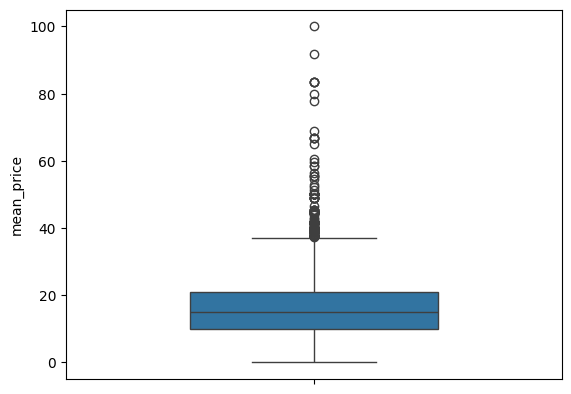

In [16]:
sns.boxplot(data_samples['mean_price'], width = 0.5)

# Большое количество выбросов в целевой переменной

In [17]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
df.head()

,Unnamed: 0,предмет,ФИО,tutor_head_tags,tutor_rating,tutor_reviews,description,experience_desc,Education_1,Desc_Education_1,Education_2,Desc_Education_2,Education_3,Desc_Education_3,Education_4,Desc_Education_4,Ученая степень 1,Ученое звание 1,status,experience,Desc_Education_5,Desc_Education_6,Education_5,Education_6,Ученая степень 2,Ученое звание 2,categories,mean_price
0,0,matematika,Репетитор по математике Емельянова Марина Вла...,"['Школьная программа', 'Подготовка к ЕГЭ', 'По...",5.0,2,Репетитор не предоставил о себе дополн...,NaN,Томский государственный университет им. В.В. ...,"Год окончания: 1990, Факультет: механико-мате...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Университетский преподаватель,31 год,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 5 по 9 класс', 'Школьники с 10 п...",16.666667
1,1,matematika,Репетитор по математике Назарова Анастасия Ан...,"['Школьная программа', 'Подготовка к ЕГЭ', 'По...",4.0,7,Репетитор не предоставил о себе дополн...,NaN,Вологодский государственный педагогический ун...,"Год окончания: 2017, Факультет: факультет при...",Череповецкий государственный университет,"Год окончания: 2023, Факультет: институт инфо...",NaN,NaN,NaN,NaN,NaN,NaN,Школьный преподаватель,8 лет,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 5 по 9 класс', 'Школьники с 10 п...",11.666667
2,2,informatika,Репетитор по информатике Мотроненко Инна Конст...,"['Школьная программа', 'Подготовка к ЕГЭ', 'По...",0.0,0,"Выезд за город: Балашиха-1, Балашиха-2...",Московская Школа (учитель ...,Московский городской педагогический университет,"Год окончания: 2008, Факультет: Математически...",Московский городской педагогический университ...,"Год окончания: 2014, Факультет: Безопасность ...",Российская таможенная академия,"Год окончания: 2011, Факультет: Экономический...",NaN,NaN,NaN,NaN,Школьный преподаватель,11 лет,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 5 по 9 класс', 'Школьники с 10 п...",23.333333
3,3,matematika,Репетитор по математике Логинова Елизавета Ал...,"['Школьная программа', 'Математический анализ'...",4.0,19,"Здравствуйте! Меня зовут Елизавета, о...",NaN,Санкт-Петербургский государственный университет,"Год окончания: 2021, Факультет: физический фа...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Частный преподаватель,5 лет,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 1 по 4 класс', 'Школьники с 5 по...",0.116667
4,4,matematika,Репетитор по математике Харланов Олег Викторо...,"['Школьная программа', 'Подготовка к ЕГЭ', 'По...",0.0,0,"Целеустремленный, ориентирован на резу...",преподавателем ...,Приазовский государственный технический униве...,"Год окончания: 2005, Факультет: Энергетически...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Частный преподаватель,19 лет,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 5 по 9 класс', 'Школьники с 10 п...",16.666667


___

## Преобразование данных

### Столбцы для удаления

In [18]:
df.head()

,Unnamed: 0,предмет,ФИО,tutor_head_tags,tutor_rating,tutor_reviews,description,experience_desc,Education_1,Desc_Education_1,Education_2,Desc_Education_2,Education_3,Desc_Education_3,Education_4,Desc_Education_4,Ученая степень 1,Ученое звание 1,status,experience,Desc_Education_5,Desc_Education_6,Education_5,Education_6,Ученая степень 2,Ученое звание 2,categories,mean_price
0,0,matematika,Репетитор по математике Емельянова Марина Вла...,"['Школьная программа', 'Подготовка к ЕГЭ', 'По...",5.0,2,Репетитор не предоставил о себе дополн...,NaN,Томский государственный университет им. В.В. ...,"Год окончания: 1990, Факультет: механико-мате...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Университетский преподаватель,31 год,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 5 по 9 класс', 'Школьники с 10 п...",16.666667
1,1,matematika,Репетитор по математике Назарова Анастасия Ан...,"['Школьная программа', 'Подготовка к ЕГЭ', 'По...",4.0,7,Репетитор не предоставил о себе дополн...,NaN,Вологодский государственный педагогический ун...,"Год окончания: 2017, Факультет: факультет при...",Череповецкий государственный университет,"Год окончания: 2023, Факультет: институт инфо...",NaN,NaN,NaN,NaN,NaN,NaN,Школьный преподаватель,8 лет,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 5 по 9 класс', 'Школьники с 10 п...",11.666667
2,2,informatika,Репетитор по информатике Мотроненко Инна Конст...,"['Школьная программа', 'Подготовка к ЕГЭ', 'По...",0.0,0,"Выезд за город: Балашиха-1, Балашиха-2...",Московская Школа (учитель ...,Московский городской педагогический университет,"Год окончания: 2008, Факультет: Математически...",Московский городской педагогический университ...,"Год окончания: 2014, Факультет: Безопасность ...",Российская таможенная академия,"Год окончания: 2011, Факультет: Экономический...",NaN,NaN,NaN,NaN,Школьный преподаватель,11 лет,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 5 по 9 класс', 'Школьники с 10 п...",23.333333
3,3,matematika,Репетитор по математике Логинова Елизавета Ал...,"['Школьная программа', 'Математический анализ'...",4.0,19,"Здравствуйте! Меня зовут Елизавета, о...",NaN,Санкт-Петербургский государственный университет,"Год окончания: 2021, Факультет: физический фа...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Частный преподаватель,5 лет,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 1 по 4 класс', 'Школьники с 5 по...",0.116667
4,4,matematika,Репетитор по математике Харланов Олег Викторо...,"['Школьная программа', 'Подготовка к ЕГЭ', 'По...",0.0,0,"Целеустремленный, ориентирован на резу...",преподавателем ...,Приазовский государственный технический униве...,"Год окончания: 2005, Факультет: Энергетически...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Частный преподаватель,19 лет,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 5 по 9 класс', 'Школьники с 10 п...",16.666667


In [19]:
# Удаляем столбцы, которые не несут информации для обучения модели
df = df.drop(['Unnamed: 0', 'ФИО',], axis=1)

### Столбец 'предмет'

In [20]:
df = pd.get_dummies(df, columns=['предмет'])
df[['предмет_informatika', 'предмет_matematika']] = df[['предмет_informatika', 'предмет_matematika']].astype(int)

### Столбец 'tutor_head_tags'

In [21]:
# Приводим тип str к list с помощью метода библиотеки ast
df['tutor_head_tags'] = transform_to_list(df, 'tutor_head_tags')

# Проверяем получилось ли перевест к классу list
print(type(df.loc[0, 'tutor_head_tags']))
df.loc[0, 'tutor_head_tags']

<class 'list'>


['Школьная программа', 'Подготовка к ЕГЭ', 'Подготовка к ОГЭ']

In [22]:
# Инициализация MultiLabelBinarizer
mlb_tutor_head_tags = MultiLabelBinarizer()

# Применение MultiLabelBinarizer к колонке 'genres'
encoded_tutor_head_tags = mlb_tutor_head_tags.fit_transform(df['tutor_head_tags'])
encoded_df_tutor_head_tags = pd.DataFrame(encoded_tutor_head_tags, columns=mlb_tutor_head_tags.classes_)

# Присоединяем закодированный df к основному
df = df.join(encoded_df_tutor_head_tags)

In [23]:
# Удаляем обработанное поле
df = df.drop('tutor_head_tags', axis=1)
df.head()

,tutor_rating,tutor_reviews,description,experience_desc,Education_1,Desc_Education_1,Education_2,Desc_Education_2,Education_3,Desc_Education_3,Education_4,Desc_Education_4,Ученая степень 1,Ученое звание 1,status,experience,Desc_Education_5,Desc_Education_6,Education_5,Education_6,Ученая степень 2,Ученое звание 2,categories,mean_price,предмет_informatika,предмет_matematika,A-level,Elementary Mathematics in English,GMAT (математическая часть),Higher Mathematics in English - высшая математика на английском языке,Mathematik auf Deutsch,SAT (математическая часть),Аналитическая геометрия,Дискретная математика,Дифференциальные уравнения,Линейная алгебра,Математическая логика,Математический анализ,Подготовка к ЕГЭ,Подготовка к ОГЭ,Подготовка к олимпиадам,ТФКП,Теория вероятности и мат. статистика,Уравнения мат физики,Школьная программа
0,5.0,2,Репетитор не предоставил о себе дополн...,NaN,Томский государственный университет им. В.В. ...,"Год окончания: 1990, Факультет: механико-мате...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Университетский преподаватель,31 год,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 5 по 9 класс', 'Школьники с 10 п...",16.666667,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1
1,4.0,7,Репетитор не предоставил о себе дополн...,NaN,Вологодский государственный педагогический ун...,"Год окончания: 2017, Факультет: факультет при...",Череповецкий государственный университет,"Год окончания: 2023, Факультет: институт инфо...",NaN,NaN,NaN,NaN,NaN,NaN,Школьный преподаватель,8 лет,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 5 по 9 класс', 'Школьники с 10 п...",11.666667,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1
2,0.0,0,"Выезд за город: Балашиха-1, Балашиха-2...",Московская Школа (учитель ...,Московский городской педагогический университет,"Год окончания: 2008, Факультет: Математически...",Московский городской педагогический университ...,"Год окончания: 2014, Факультет: Безопасность ...",Российская таможенная академия,"Год окончания: 2011, Факультет: Экономический...",NaN,NaN,NaN,NaN,Школьный преподаватель,11 лет,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 5 по 9 класс', 'Школьники с 10 п...",23.333333,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1
3,4.0,19,"Здравствуйте! Меня зовут Елизавета, о...",NaN,Санкт-Петербургский государственный университет,"Год окончания: 2021, Факультет: физический фа...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Частный преподаватель,5 лет,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 1 по 4 класс', 'Школьники с 5 по...",0.116667,0,1,0,0,0,0,0,0,1,0,1,1,0,1,1,1,0,0,1,0,1
4,0.0,0,"Целеустремленный, ориентирован на резу...",преподавателем ...,Приазовский государственный технический униве...,"Год окончания: 2005, Факультет: Энергетически...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Частный преподаватель,19 лет,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 5 по 9 класс', 'Школьники с 10 п...",16.666667,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1


### Столбец 'tutor_rating'

In [24]:
print('У столбца "Рейтинг преподавателя" отсутствует значений = ', df['tutor_rating'].isnull().sum())

# Заменяем все значения null в этом столбце на 0, т.к. преподаватель не имеет рейтинга
df['tutor_rating'] = transaformation_null_value(df, 'tutor_rating')

print('После преобразований у столбца "Рейтинг преподавателя" отсутствует значений = ', df['tutor_rating'].isnull().sum())

У столбца "Рейтинг преподавателя" отсутствует значений =  589
После преобразований у столбца "Рейтинг преподавателя" отсутствует значений =  0


### Столбец 'tutor_reviews'

У столбца "Количество отзывов" отсутствует значений =  0
Довольно много значений выходят за пределы boxplot, но т.к.к это относится к отзывам, это вполне возможно 


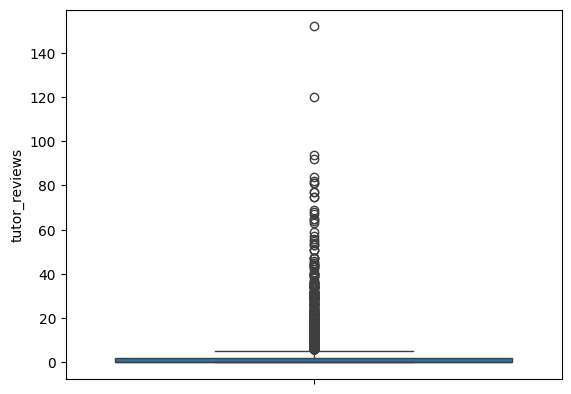

In [25]:
print('У столбца "Количество отзывов" отсутствует значений = ', df['tutor_reviews'].isnull().sum())
df['tutor_reviews'].describe()
sns.boxplot(df['tutor_reviews'])

print('Довольно много значений выходят за пределы boxplot, но т.к.к это относится к отзывам, это вполне возможно ')

In [26]:
df['tutor_reviews'].describe()

,tutor_reviews
count,4548.000000
mean,2.989006
std,8.516939
min,0.000000
25%,0.000000
50%,0.000000
75%,2.000000
max,152.000000


### Столбец 'description'

In [27]:
# Переменная, которая сообщает нам, что репитотор не заполнил инфо о себе
no_info_about_tutor = '        Репетитор не предоставил о себе дополнительных сведений    '

count_null_descr = df['description'].isnull().sum()
count_without_descr = df.loc[df['description'] == no_info_about_tutor]

print('Количество преподавателей без описания(null) = ', count_null_descr)
print('Количество преподавателей, которые не предоставили информацию = ', count_without_descr.shape[0])

# Переводим в числовое значение, если описание заполнено или не null, то ставим 1, иначе 0
df['description'] = df['description'].apply(lambda x: 1 if x != no_info_about_tutor and pd.isnull(x) else 0)

Количество преподавателей без описания(null) =  1
Количество преподавателей, которые не предоставили информацию =  1123


### Столбец 'experience_desc'

In [28]:
count_null_experience_desc = df['experience_desc'].isnull().sum()

print('Количество незаполненные строк с описанием своего опыта = ', count_null_experience_desc)

# Если в столбце описания опыта, стоит не null,то единичка, иначе 0
df['experience_desc'] = transaformation_null_value(df, 'experience_desc')

# df['experience_desc'].apply(lambda x: 1 if pd.isnull(x) else 0)


Количество незаполненные строк с описанием своего опыта =  2377


### Столбец 'Education_1' и 'Desc_Education_1'

In [29]:
# Предлагаю убрать столбец Education 1 и Descr Education_1, т.к. так как все, кто учавствует в этой выборке имеют хотя бы 1 университетское образование
df['Education_1'].isnull().sum()

df = df.drop(['Education_1', 'Desc_Education_1'], axis= 1)

### Столбцы под преобразование Null значений

In [30]:
# Берем только столбцы по описанию образования, если они не null, то ставим 1, иначе 0.
# Education удаляем, чтобы не дублировать значения

columns_to_delete = ['Education_2', 'Education_3', 'Education_4', 'Education_5', 'Education_6']
columns_to_transform = ['Desc_Education_2', 'Desc_Education_3', 'Desc_Education_4', 'Desc_Education_5', 'Desc_Education_6', 'Ученое звание 2', 'Ученая степень 2']
df = df.drop(columns_to_delete, axis=1)

for col in columns_to_transform:
  df[col] = transaformation_null_value(df, col)

### Ученая степень и звание

In [31]:
print('Количество ученых званий = ', df['Ученое звание 1'].nunique())
print('Количество людей с учеными званиями = ', df.shape[0] - df['Ученое звание 1'].isnull().sum())

print('\nКоличество ученых степеней = ',df['Ученая степень 1'].nunique())
print('Количество людей с учеными степенями = ', df.shape[0] - df['Ученая степень 1'].isnull().sum())

encoder_degree = LabelEncoder()
encoder_rank = LabelEncoder()

df['Ученое звание 1'] = encoder_degree.fit_transform(df['Ученое звание 1'])
df['Ученая степень 1'] = encoder_rank.fit_transform(df['Ученая степень 1'])

Количество ученых званий =  7
Количество людей с учеными званиями =  35

Количество ученых степеней =  13
Количество людей с учеными степенями =  76


### Столбец 'Status'

In [32]:
display(df['status'].value_counts())

# Заменил если null на 0
df['status'] = df['status'].fillna(0)

encoded_status =  df['status'].str.get_dummies(sep=',')

df = df.join(encoded_status)
df = df.drop('status', axis =1)

,count
status,
Частный преподаватель,2345
Студент,1288
Школьный преподаватель,558
Университетский преподаватель,129
"Частный преподаватель, Студент",92
"Университетский преподаватель, Школьный преподаватель",47
Аспирант или ординатор очной формы обучения,45
"Аспирант или ординатор очной формы обучения, Частный преподаватель",15
"Университетский преподаватель, Аспирант или ординатор очной формы обучения",13


In [33]:
df

,tutor_rating,tutor_reviews,description,experience_desc,Desc_Education_2,Desc_Education_3,Desc_Education_4,Ученая степень 1,Ученое звание 1,experience,Desc_Education_5,Desc_Education_6,Ученая степень 2,Ученое звание 2,categories,mean_price,предмет_informatika,предмет_matematika,A-level,Elementary Mathematics in English,GMAT (математическая часть),Higher Mathematics in English - высшая математика на английском языке,Mathematik auf Deutsch,SAT (математическая часть),Аналитическая геометрия,Дискретная математика,Дифференциальные уравнения,Линейная алгебра,Математическая логика,Математический анализ,Подготовка к ЕГЭ,Подготовка к ОГЭ,Подготовка к олимпиадам,ТФКП,Теория вероятности и мат. статистика,Уравнения мат физики,Школьная программа,Аспирант или ординатор очной формы обучения,Студент,Университетский преподаватель,Частный преподаватель,Школьный преподаватель,0
0,0,2,0,1,1,1,1,13,7,31 год,1,1,1,1,"['Школьники с 5 по 9 класс', 'Школьники с 10 п...",16.666667,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0
1,0,7,0,1,0,1,1,13,7,8 лет,1,1,1,1,"['Школьники с 5 по 9 класс', 'Школьники с 10 п...",11.666667,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,0,0,1,13,7,11 лет,1,1,1,1,"['Школьники с 5 по 9 класс', 'Школьники с 10 п...",23.333333,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0
3,0,19,0,1,1,1,1,13,7,5 лет,1,1,1,1,"['Школьники с 1 по 4 класс', 'Школьники с 5 по...",0.116667,0,1,0,0,0,0,0,0,1,0,1,1,0,1,1,1,0,0,1,0,1,0,0,0,1,0,0
4,0,0,0,0,1,1,1,13,7,19 лет,1,1,1,1,"['Школьники с 5 по 9 класс', 'Школьники с 10 п...",16.666667,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4543,0,11,0,1,1,1,1,13,7,5 лет,1,1,1,1,"['Школьники с 1 по 4 класс', 'Школьники с 5 по...",16.666667,0,1,0,0,0,0,0,0,1,0,1,1,0,1,1,1,0,0,0,0,1,0,0,0,1,0,0
4544,0,0,0,0,1,1,1,13,7,30 лет,1,1,1,1,['Школьники с 5 по 9 класс'],33.333333,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0
4545,0,0,0,0,1,1,1,13,7,6 лет,1,1,1,1,"['Школьники с 5 по 9 класс', 'Школьники с 10 п...",23.333333,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0
4546,0,0,0,0,1,1,1,13,7,1 год,1,1,1,1,"['Школьники с 5 по 9 класс', 'Школьники с 10 п...",9.722222,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0


### Столбец 'experience'

In [34]:
# Оставим только числа в колонке
df['experience'] = df['experience'].str.replace(r"[^\d\.]", "", regex=True)
# преобразуем колонку в числовой формат
df['experience'] = df['experience'].astype('float64')

# Заменял на 0, если null
df['experience'] = df['experience'].fillna(0)

### Столбец 'categories'

In [35]:
df['categories'] = transform_to_list(df, 'categories')

In [36]:
# Инициализация MultiLabelBinarizer
mlb_categories = MultiLabelBinarizer()

# Применение MultiLabelBinarizer к колонке 'genres'
encoded_categories = mlb_categories.fit_transform(df['categories'])
encoded_df_categories = pd.DataFrame(encoded_categories, columns=mlb_categories.classes_)

# Присоединяем закодированный df к основному
df = df.join(encoded_df_categories)

In [37]:
df = df.drop('categories', axis=1)

In [38]:
df.head()

,tutor_rating,tutor_reviews,description,experience_desc,Desc_Education_2,Desc_Education_3,Desc_Education_4,Ученая степень 1,Ученое звание 1,experience,Desc_Education_5,Desc_Education_6,Ученая степень 2,Ученое звание 2,mean_price,предмет_informatika,предмет_matematika,A-level,Elementary Mathematics in English,GMAT (математическая часть),Higher Mathematics in English - высшая математика на английском языке,Mathematik auf Deutsch,SAT (математическая часть),Аналитическая геометрия,Дискретная математика,Дифференциальные уравнения,Линейная алгебра,Математическая логика,Математический анализ,Подготовка к ЕГЭ,Подготовка к ОГЭ,Подготовка к олимпиадам,ТФКП,Теория вероятности и мат. статистика,Уравнения мат физики,Школьная программа,Аспирант или ординатор очной формы обучения,Студент,Университетский преподаватель,Частный преподаватель,Школьный преподаватель,0,Взрослые кроме абитуриентов и студентов,Взрослые кроме абитуриентов и студентов в паре,Взрослые кроме абитуриентов и студентов группа,Дошкольники,Дошкольники в паре,Дошкольники группа,Студенты университетов,Студенты университетов в паре,Школьники с 1 по 4 класс,Школьники с 1 по 4 класс в паре,Школьники с 1 по 4 класс группа,"Школьники с 10 по 11 класс, студенты колледжей и техникумов, абитуриенты","Школьники с 10 по 11 класс, студенты колледжей и техникумов, абитуриенты в паре","Школьники с 10 по 11 класс, студенты колледжей и техникумов, абитуриенты группа",Школьники с 5 по 9 класс,Школьники с 5 по 9 класс в паре,Школьники с 5 по 9 класс группа
0,0,2,0,1,1,1,1,13,7,31.0,1,1,1,1,16.666667,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
1,0,7,0,1,0,1,1,13,7,8.0,1,1,1,1,11.666667,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
2,0,0,0,0,0,0,1,13,7,11.0,1,1,1,1,23.333333,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
3,0,19,0,1,1,1,1,13,7,5.0,1,1,1,1,0.116667,0,1,0,0,0,0,0,0,1,0,1,1,0,1,1,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0
4,0,0,0,0,1,1,1,13,7,19.0,1,1,1,1,16.666667,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4548 entries, 0 to 4547
Data columns (total 59 columns):
 #   Column                                                                           Non-Null Count  Dtype  
---  ------                                                                           --------------  -----  
 0   tutor_rating                                                                     4548 non-null   int64  
 1   tutor_reviews                                                                    4548 non-null   int64  
 2   description                                                                      4548 non-null   int64  
 3   experience_desc                                                                  4548 non-null   int64  
 4   Desc_Education_2                                                                 4548 non-null   int64  
 5   Desc_Education_3                                                                 4548 non-null   int64  
 6   Desc_Edu

## Подготовка к обучению модели

### Проверяем корреляционную матрицу

In [40]:
# Перемещаем для удобства целевой столбец в конец
df['mean_price'] = df.pop('mean_price')

In [41]:
# Навсякий случай, если что то забыли перевести из null, то переводим в 0
df = df.fillna(0)

In [42]:
df

,tutor_rating,tutor_reviews,description,experience_desc,Desc_Education_2,Desc_Education_3,Desc_Education_4,Ученая степень 1,Ученое звание 1,experience,Desc_Education_5,Desc_Education_6,Ученая степень 2,Ученое звание 2,предмет_informatika,предмет_matematika,A-level,Elementary Mathematics in English,GMAT (математическая часть),Higher Mathematics in English - высшая математика на английском языке,Mathematik auf Deutsch,SAT (математическая часть),Аналитическая геометрия,Дискретная математика,Дифференциальные уравнения,Линейная алгебра,Математическая логика,Математический анализ,Подготовка к ЕГЭ,Подготовка к ОГЭ,Подготовка к олимпиадам,ТФКП,Теория вероятности и мат. статистика,Уравнения мат физики,Школьная программа,Аспирант или ординатор очной формы обучения,Студент,Университетский преподаватель,Частный преподаватель,Школьный преподаватель,0,Взрослые кроме абитуриентов и студентов,Взрослые кроме абитуриентов и студентов в паре,Взрослые кроме абитуриентов и студентов группа,Дошкольники,Дошкольники в паре,Дошкольники группа,Студенты университетов,Студенты университетов в паре,Школьники с 1 по 4 класс,Школьники с 1 по 4 класс в паре,Школьники с 1 по 4 класс группа,"Школьники с 10 по 11 класс, студенты колледжей и техникумов, абитуриенты","Школьники с 10 по 11 класс, студенты колледжей и техникумов, абитуриенты в паре","Школьники с 10 по 11 класс, студенты колледжей и техникумов, абитуриенты группа",Школьники с 5 по 9 класс,Школьники с 5 по 9 класс в паре,Школьники с 5 по 9 класс группа,mean_price
0,0,2,0,1,1,1,1,13,7,31.0,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,16.666667
1,0,7,0,1,0,1,1,13,7,8.0,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,11.666667
2,0,0,0,0,0,0,1,13,7,11.0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,23.333333
3,0,19,0,1,1,1,1,13,7,5.0,1,1,1,1,0,1,0,0,0,0,0,0,1,0,1,1,0,1,1,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0.116667
4,0,0,0,0,1,1,1,13,7,19.0,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,16.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4543,0,11,0,1,1,1,1,13,7,5.0,1,1,1,1,0,1,0,0,0,0,0,0,1,0,1,1,0,1,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,16.666667
4544,0,0,0,0,1,1,1,13,7,30.0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,33.333333
4545,0,0,0,0,1,1,1,13,7,6.0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,23.333333
4546,0,0,0,0,1,1,1,13,7,1.0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,9.722222


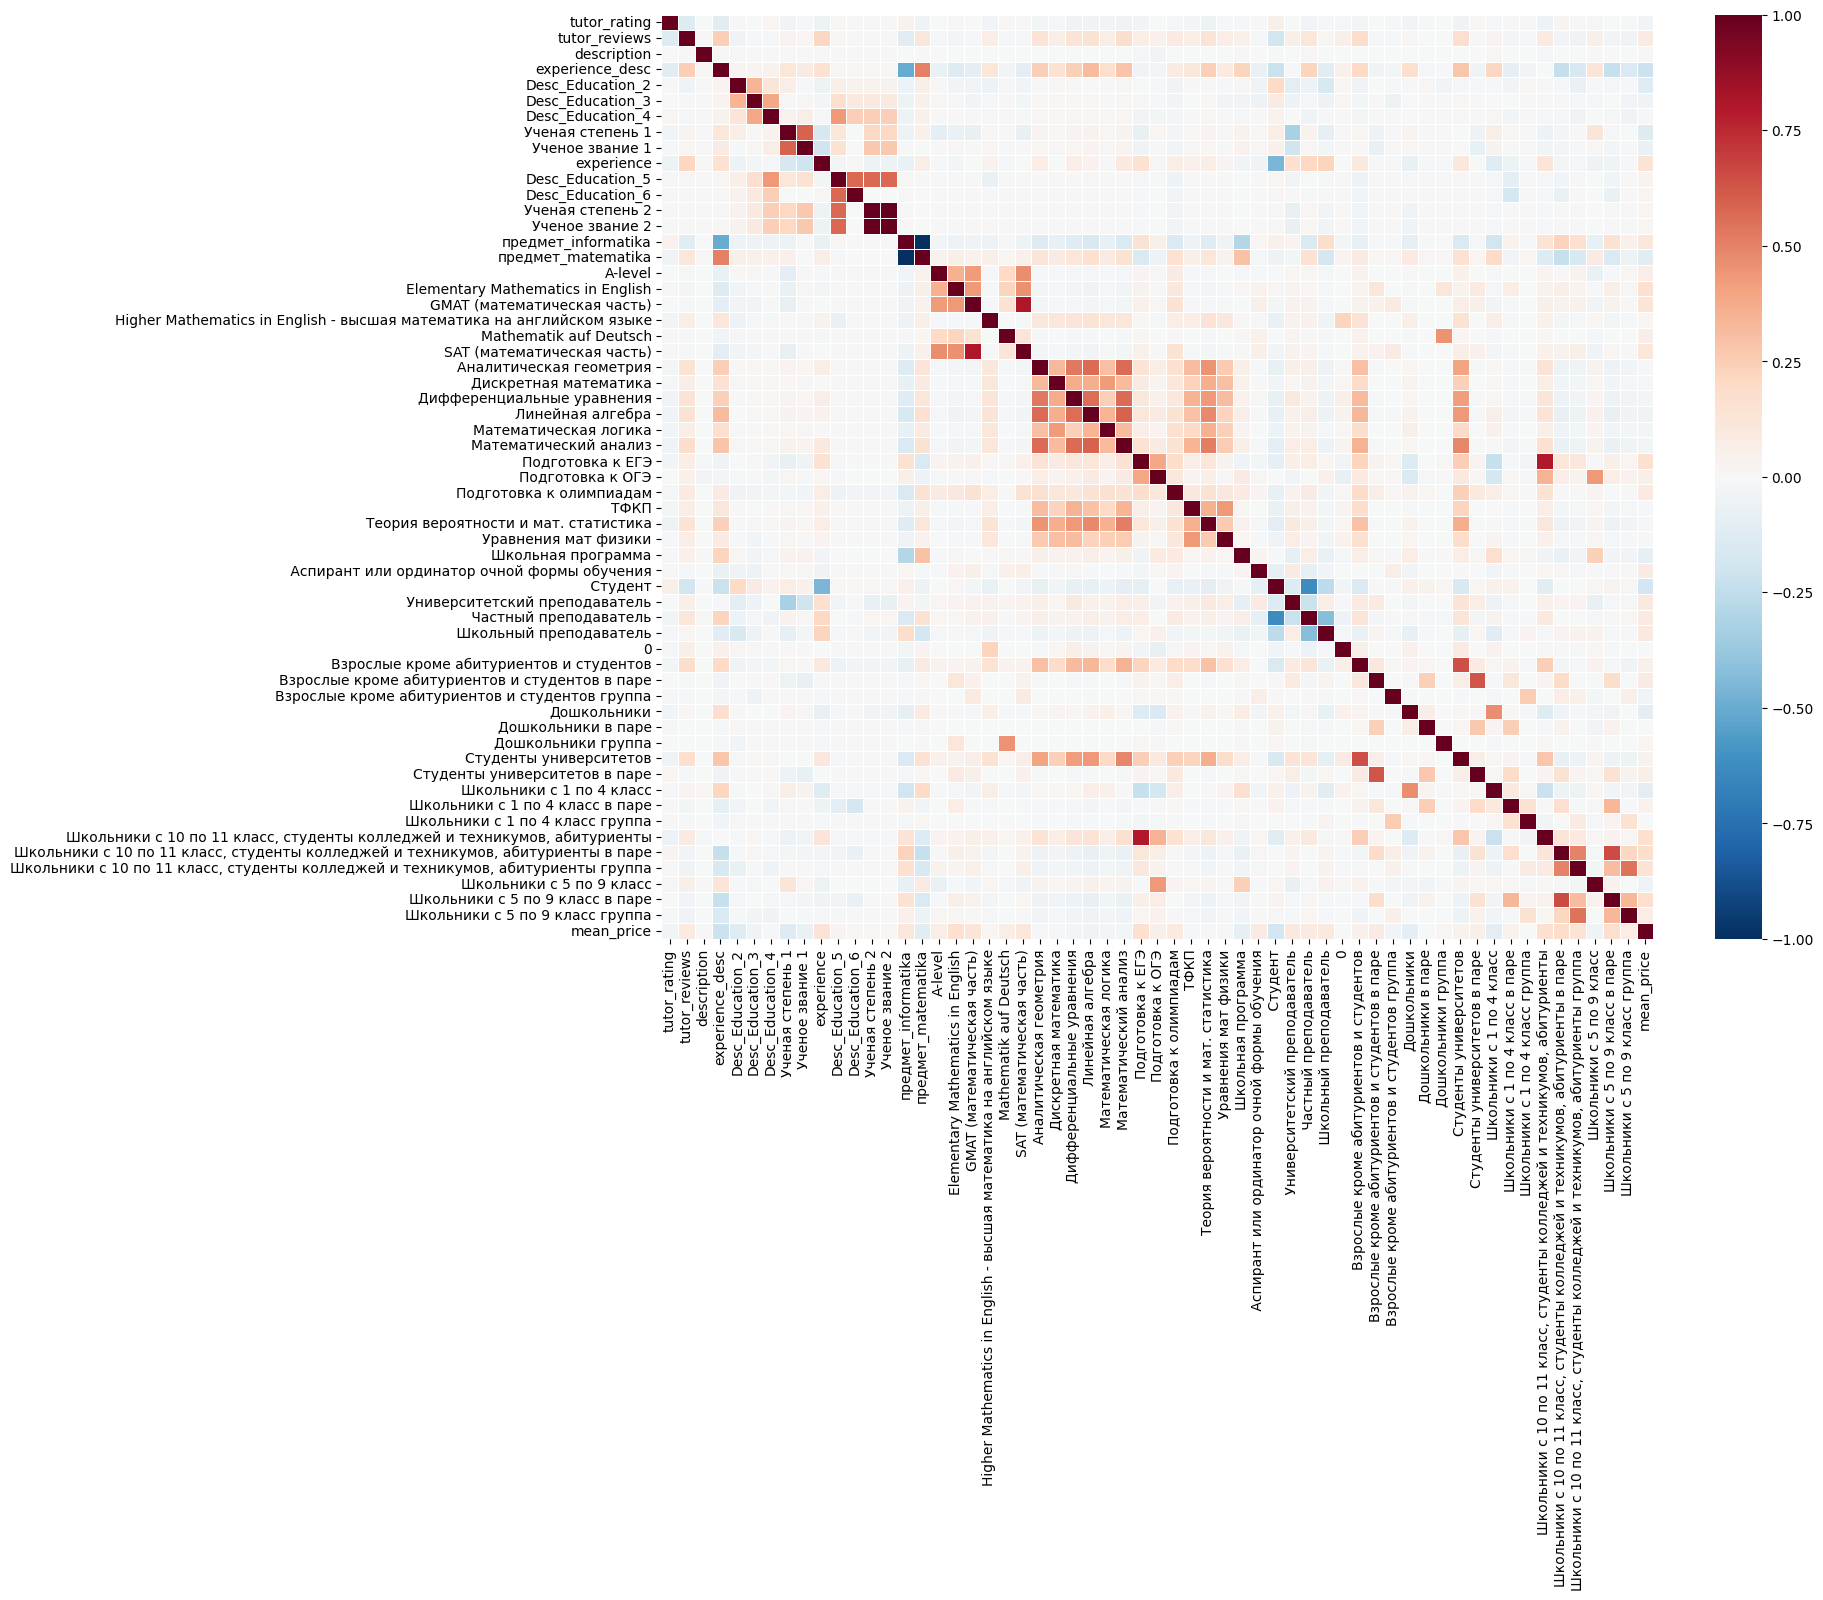

In [43]:
# Строим корреляционную матрицу факторов + целевой признак.
corr_matrix = df.corr()

# рисуем тепловую карту
plt.figure(figsize=(16,12))
sns.heatmap(corr_matrix, cmap='RdBu_r', annot=False, center=0, linewidths=0.5);

In [44]:
# Устанавливаем порог высокой корреляции
threshold = 0.7

# Выбираем только сильные корреляции (кроме корреляции столбца с самим собой)
strong_corrs = (corr_matrix.abs() > threshold) & (corr_matrix.abs() < 1.0)

# Преобразуем в список пар
strong_corr_pairs = [
    (corr_matrix.index[i], corr_matrix.columns[j], corr_matrix.iloc[i, j])
    for i in range(len(corr_matrix.index))
    for j in range(i + 1, len(corr_matrix.columns))  # Чтобы не дублировать пары
    if strong_corrs.iloc[i, j]
]

strong_corr_df = pd.DataFrame(strong_corr_pairs, columns=["Feature 1", "Feature 2", "Correlation"])
strong_corr_df.sort_values(by="Correlation", ascending=False, inplace=True)

display(strong_corr_df)


# Как мы видим, у двух столбцов есть высокая корреляция между собой. Удалим один из них

df = df.drop(['GMAT (математическая часть)','0'], axis = 1)

,Feature 1,Feature 2,Correlation
0,GMAT (математическая часть),SAT (математическая часть),0.809865
1,Подготовка к ЕГЭ,"Школьники с 10 по 11 класс, студенты колледжей...",0.801016


### Создаем модель линейной регрессии

In [45]:
# Выделяем признаки(Х) и целевую переменную (y)
X = df.drop(columns=['mean_price'])
y = df['mean_price']

In [46]:
# Разделяем на тестовую и обучающую выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(f'Train dataset size: {X_train.shape}, {y_train.shape}')
print(f'Test dataset size: {X_test.shape}, {y_test.shape}')

Train dataset size: (3638, 56), (3638,)
Test dataset size: (910, 56), (910,)


In [47]:
# Создаем модель линейной регрессии
lig_reg = LinearRegression()


lig_reg.fit(X_train, y_train)

y_pred = lig_reg.predict(X_test)

print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R2 score:', r2_score(y_test, y_pred))

Mean Absolute Error: 6.84146759939272
Mean Squared Error: 90.45330749944478
R2 score: 0.21662509195301238


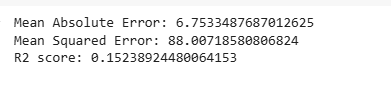

### Предсказания для test

In [48]:
lig_reg = LinearRegression()
lig_reg.fit(X, y)

LinearRegression()

In [49]:
df_train_f = df.copy()

In [50]:
df = data_test.copy()

df = df.drop(['Unnamed: 0', 'ФИО',], axis=1)

df = pd.get_dummies(df, columns=['предмет'])
df[['предмет_informatika', 'предмет_matematika']] = df[['предмет_informatika', 'предмет_matematika']].astype(int)

df['tutor_head_tags'] = transform_to_list(df, 'tutor_head_tags')
tutor_head_tags_test = mlb_tutor_head_tags.transform(df['tutor_head_tags'])
encoded_df_tutor_head_tags_test = pd.DataFrame(tutor_head_tags_test, columns=mlb_tutor_head_tags.classes_)
df = df.join(encoded_df_tutor_head_tags)
df = df.drop('tutor_head_tags', axis=1)

df['tutor_rating'] = transaformation_null_value(df, 'tutor_rating')

df['description'] = df['description'].apply(lambda x: 1 if x != no_info_about_tutor and pd.isnull(x) else 0)

df['experience_desc'] = transaformation_null_value(df, 'experience_desc')

df = df.drop(['Education_1', 'Desc_Education_1'], axis= 1)

columns_to_delete = ['Education_2', 'Education_3', 'Education_4', 'Education_5', 'Education_6']
columns_to_transform = ['Desc_Education_2', 'Desc_Education_3', 'Desc_Education_4', 'Desc_Education_5', 'Desc_Education_6', 'Ученое звание 2', 'Ученая степень 2']
df = df.drop(columns_to_delete, axis=1)

df['Ученое звание 1'] = encoder_degree.transform(df['Ученое звание 1'])
df['Ученая степень 1'] = encoder_rank.transform(df['Ученая степень 1'])

df['status'] = df['status'].fillna(0)
encoded_status =  df['status'].str.get_dummies(sep=',')
df = df.drop('status', axis =1)
df = df.join(encoded_status)

for col in columns_to_transform:
  df[col] = transaformation_null_value(df, col)

df['experience'] = df['experience'].str.replace(r"[^\d\.]", "", regex=True)
df['experience'] = df['experience'].astype('float64')
df['experience'] = df['experience'].fillna(0)

df['categories'] = transform_to_list(df, 'categories')
encoded_categories_test = mlb_categories.transform(df['categories'])
encoded_df_categories_test = pd.DataFrame(encoded_categories_test, columns=mlb_categories.classes_)
df = df.join(encoded_df_categories_test)
df = df.drop('categories', axis=1)

df = df.drop(['GMAT (математическая часть)','0'], axis = 1)

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:909: UserWarning: unknown class(es) ['Студенты университетов группа'] will be ignored
  warnings.warn(


In [51]:
df = df[X.columns]
y_test = lig_reg.predict(df)

In [52]:
submition = pd.DataFrame(y_test, columns=['mean_price'])
submition = submition.reset_index()
submition

,index,mean_price
0,0,17.358153
1,1,10.818907
2,2,22.270730
3,3,12.672897
4,4,13.921419
...,...,...
1511,1511,14.929148
1512,1512,23.883284
1513,1513,19.341746
1514,1514,17.599937


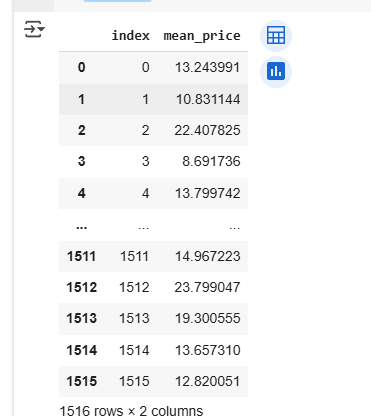

In [53]:
submition.to_csv('my_submit_v3.csv', index=False)